## Dimension Reduction

Dimension reduction is a technique used in machine learning to reduce the number of input variables or features in a dataset while preserving the important information. It is particularly useful when dealing with high-dimensional data, where the number of features is large compared to the number of observations.

The main goal of dimension reduction is to simplify the dataset by transforming it into a lower-dimensional space, while still retaining as much of the original information as possible. This can help in improving the efficiency of machine learning algorithms, reducing computational complexity, and avoiding the curse of dimensionality.

There are various dimension reduction techniques available, such as Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA), t-SNE, and Autoencoders. These techniques aim to find a lower-dimensional representation of the data that captures the most important patterns and relationships.


### Removing features without variance

Using the `describe()` method identifies which (if any) feature contains no variance or only unique values. It is usually worth excluding these features as they don't add value to the data.

Reducing dimensions allows the data to be less complicated, requires less disk space and computation time, and decreases the chance of the model overfitting.

Some features are irrelvant, eg a person's eye colour does not impact whether they will default on their loan or not.

In [3]:
import pandas as pd

# read pokemon dataframe
pokemon_df = pd.read_csv('datasets/pokemon.csv')

number_cols = ['HP', 'Attack', 'Defense', 'Generation']
# Look for feature without variance (generation)
print(pokemon_df[number_cols].describe())


               HP      Attack     Defense  Generation
count  800.000000  800.000000  800.000000   800.00000
mean    69.258750   79.001250   73.842500     3.32375
std     25.534669   32.457366   31.183501     1.66129
min      1.000000    5.000000    5.000000     1.00000
25%     50.000000   55.000000   50.000000     2.00000
50%     65.000000   75.000000   70.000000     3.00000
75%     80.000000  100.000000   90.000000     5.00000
max    255.000000  190.000000  230.000000     6.00000


## Pairplot

A pairplot is a type of plot in which multiple scatter plots are created for each pair of variables in a dataset. It is a useful visualization technique to explore the relationships between multiple variables.

Pairplots are commonly used to:

- Identify patterns and correlations between variables
- Visualize the distribution of variables
- Detect outliers and anomalies

By plotting all possible combinations of variables, pairplots provide a comprehensive view of the relationships within a dataset. They can help in understanding the overall structure and characteristics of the data.


## Feature Selection

Feature selection is the process of selecting a subset of relevant features from a larger set of features in a dataset. The goal of feature selection is to improve the performance of a machine learning model by reducing the dimensionality of the input data.

There are several techniques for feature selection, including:

- Univariate feature selection: This method selects features based on their individual relationship with the target variable.
- Recursive feature elimination: This method recursively eliminates features based on their importance.
- L1 regularization: This method adds a penalty term to the loss function to encourage sparsity in the feature weights.

Feature selection helps to reduce overfitting, improve model interpretability, and reduce training time and memory usage.


## Feature Extraction

Feature extraction is the process of transforming the original features into a new set of features that captures the essential information in the data. The goal of feature extraction is to reduce the dimensionality of the input data while preserving the most important information.

Feature extraction techniques include:

- Principal Component Analysis (PCA): This method transforms the data into a new set of uncorrelated variables called principal components.
- Linear Discriminant Analysis (LDA): This method maximizes the separation between different classes in the data.
- Non-negative Matrix Factorization (NMF): This method decomposes the data into non-negative components.

Feature extraction can help to reduce the computational complexity of the model, remove noise and redundancy in the data, and improve model performance.


Pairplots are used to investigate feature importance.

```
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_1, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()
```

![image](ansur_pp_1.png)


Plot above reveals that `stature_m` is a redundant feature.

```
# Remove one of the redundant features
reduced_df = ansur_df_1.drop('stature_m', axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender')

# Show the plot
plt.show()
```
![image](ansur_pp_2.png)


### t-SNE

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique that is commonly used for visualizing high-dimensional data in a lower-dimensional space. It is particularly useful for visualizing complex datasets with non-linear relationships.

Unlike other dimensionality reduction techniques such as PCA (Principal Component Analysis), t-SNE preserves the local structure of the data, making it effective for revealing clusters or patterns in the data.

The algorithm works by modeling the similarity between data points in the high-dimensional space and the low-dimensional space. It then tries to minimize the difference between these similarities, effectively mapping the high-dimensional data to a lower-dimensional space while preserving the relationships between the data points.

t-SNE is often used in exploratory data analysis, data visualization, and feature engineering tasks.

(6068, 2)


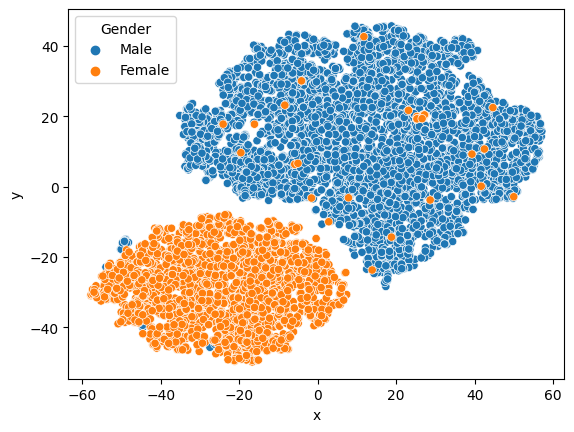

In [18]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_male = pd.read_csv('datasets/ANSUR_II_MALE.csv')
df_female = pd.read_csv('datasets/ANSUR_II_FEMALE.csv')

df = pd.concat([df_male, df_female])  

# Non-numerical columns in the dataset
non_numeric = ['Branch', 'Gender', 'Component', 'BMI_class','Height_class']

# Drop the non-numerical columns from df
df_numeric = df.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

df['x'] = tsne_features[:,0]
df['y'] = tsne_features[:,1]

# Color the points by Gender
sns.scatterplot(x="x", y="y", hue='Gender', data=df)

# Show the plot
plt.show()

There is a Male and a Female cluster, and t-SNE found these gender differences in body shape without being told about them explicitly.

### Curse of Dimension Reduction example

### Testing Overfitting

You can test overfitting by comparing the accuracies on the test set and training set.
```
# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the Gender column as the feature to be predicted (y)
y = ansur_df['Gender']

# Remove the Gender column to create the training data
X = ansur_df.drop('Gender', axis=1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"{X_test.shape[0]} rows in test set vs. {X_train.shape[0]} in training set, {X_test.shape[1]} Features.")

<script.py> output:
    60 rows in test set vs. 140 in training set, 92 Features.
```
Create a support vector machine classifier model `SVC()` and fit that to the training data, then calculate the accuracy on both the test and training set to detect overfitting.

```
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print(f"{accuracy_test:.1%} accuracy on test set vs. {accuracy_train:.1%} on training set")
81.7% accuracy on test set vs. 88.6% on training set
```
Looks like the model overfitted on the training data by a little bit.

### Accuracy after dimensionality reduction

Reduce the overfit with the help of dimensionality reduction. In this case, apply a rather drastic form of dimensionality reduction by only selecting a single column that has some good information to distinguish between genders.

```
# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = ansur_df[['neckcircumferencebase']]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print(f"{accuracy_test:.1%} accuracy on test set vs. {accuracy_train:.1%} on training set")

<script.py> output:
    95.0% accuracy on test set vs. 95.0% on training set
```
The single feature model outperforms the one trained on all features. This is an example of the curse of dimensionality, the model overfits when fed too many features. It overlooks that neck circumference by itself is pretty different for males and females

### Feature Selection

Use variance thresholds to select features with suitable variance. Too small variance will not allow the model to distinquish between attributes.
Missing values also impact models and should therefore be dropped or replaced.

**Finding a good variance threshold**

Create boxplot to view dataframe variance, divide dataframe by mean to normalize. Look at normalized variances to determine good threshold

```
# Normalize the data
normalized_df = df / df.mean()

normalized_df.boxplot()
plt.show()

# Print the variances of the normalized data
print(normalized_df.var())
```
Let's say 2 features had variance less than 0.001. Use that as threshold:

```
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.001)

# Fit the selector to normalized head_df
sel.fit(head_df / head_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced DataFrame
reduced_df = head_df.loc[:, mask]

print(f"Dimensionality reduced from {head_df.shape[1]} to {reduced_df.shape[1]}.")

Dimensionality reduced from 6 to 4.
```

### Removing features with many missing values

```
# Create a boolean mask on whether each feature less than 50% missing values.
mask = school_df.isna().sum() / len(school_df) < 0.5

# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:,mask]

print(school_df.shape)
print(reduced_df.shape)

<script.py> output:
    (131, 21)
    (131, 19)
```

### Visualizing the correlation matrix

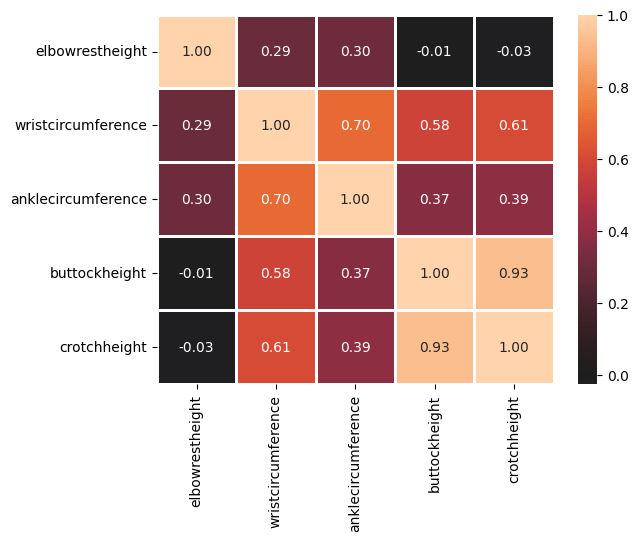

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_male = pd.read_csv('datasets/ANSUR_II_MALE.csv')
df_female = pd.read_csv('datasets/ANSUR_II_FEMALE.csv')

features = ['elbowrestheight','wristcircumference', 'anklecircumference','buttockheight','crotchheight']

df = pd.concat([df_male, df_female])  

ansur_df = df[features]

# Create the correlation matrix
corr = df_ansur.corr()

# Draw a heatmap of the correlation matrix
sns.heatmap(corr, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

Can be interpreted more easily by removing upper half triangle of matrix with mask:

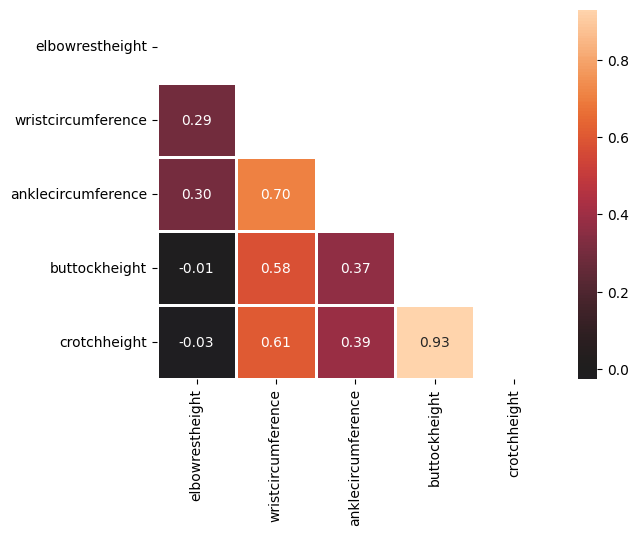

In [10]:
import numpy as np

# Create the correlation matrix
corr = ansur_df.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

### Removing highly correlated features

In [11]:
# Calculate the correlation matrix and take the absolute value
corr_df = ansur_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]

# Drop the features in the to_drop list
reduced_df = ansur_df.drop(to_drop, axis=1)

print(f"The reduced_df DataFrame has {reduced_df.shape[1]} columns.")

The reduced_df DataFrame has 5 columns.


## Recursive Feature Elimination (RFE)

Recursive Feature Elimination (RFE) is a feature selection method that recursively eliminates features from a given dataset. It starts by training a model on the entire set of features and ranks the importance of each feature based on a specified metric (e.g., coefficient values, feature importance scores). The least important feature(s) are then removed, and the process is repeated until a desired number of features remains.

RFE is an iterative process that helps identify the most relevant features for a given problem. It can be used in combination with any machine learning algorithm that supports feature importance estimation.

The main steps involved in RFE are as follows:

1. Train a model on the entire set of features.
2. Rank the importance of each feature based on a specified metric.
3. Remove the least important feature(s).
4. Repeat steps 1-3 until a desired number of features remains.

RFE can be a useful technique for reducing the dimensionality of a dataset and improving the performance of machine learning models by focusing on the most informative features.

### Manual Recursive Feature Elimination

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

diabetes_df = pd.read_csv('datasets/PimaIndians.csv')

X = diabetes_df.drop('test', axis=1)
y = diabetes_df['test']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

scaler = StandardScaler()
lr = LogisticRegression()

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Fit the logistic regression model on the scaled training data
lr.fit(X_train_std, y_train)

# Scale the test features
X_test_std = scaler.transform(X_test)

# Predict diabetes presence on the scaled test set
y_pred = lr.predict(X_test_std)

# Prints accuracy metrics and feature coefficients
print(f"{accuracy_score(y_test, y_pred):.1%} accuracy on test set.")
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

71.4% accuracy on test set.
{'pregnant': 0.5, 'glucose': 1.18, 'diastolic': 0.08, 'triceps': 0.23, 'insulin': 0.14, 'bmi': 0.4, 'family': 0.48, 'age': 0.15}


Remove the feature with the lowest model coefficients

In [17]:
# Remove the feature with the lowest model coefficients
X = diabetes_df[['pregnant', 'glucose', 'triceps', 'insulin', 'bmi', 'family', 'age']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print(f"{acc:.1%} accuracy on test set.") 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

80.6% accuracy on test set.
{'pregnant': 0.05, 'glucose': 1.24, 'triceps': 0.24, 'insulin': 0.2, 'bmi': 0.39, 'family': 0.34, 'age': 0.35}


Remove the 2 features with the lowest model coefficients

In [18]:
# Remove the 2 features with the lowest model coefficients
X = diabetes_df[['glucose', 'triceps', 'bmi', 'family', 'age']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print(f"{acc:.1%} accuracy on test set.") 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

79.6% accuracy on test set.
{'glucose': 1.13, 'triceps': 0.25, 'bmi': 0.34, 'family': 0.34, 'age': 0.37}


Only keep the feature with the highest coefficient

In [19]:
# Only keep the feature with the highest coefficient
X = diabetes_df[['glucose']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model to the data
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print(f"{acc:.1%} accuracy on test set.")  
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

75.5% accuracy on test set.
{'glucose': 1.28}


Removing all but one feature only reduced the accuracy by a few percent.

### Automatic Recursive Feature Elimination

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

diabetes_df = pd.read_csv('datasets/PimaIndians.csv')

X = diabetes_df.drop('test', axis=1)
y = diabetes_df['test']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

# Create the RFE with a LogisticRegression estimator and 3 features to select
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1)

# Fits the eliminator to the data
rfe.fit(X_train, y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))

# Print the features that are not eliminated
print(X.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test))
print(f"{acc:.1%} accuracy on test set.") 

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
{'pregnant': 1, 'glucose': 2, 'diastolic': 5, 'triceps': 4, 'insulin': 6, 'bmi': 1, 'family': 1, 'age': 3}
Index(['pregnant', 'bmi', 'family'], dtype='object')
74.5% accuracy on test set.


## Tree-Based Feature Selection

Tree-based feature selection is a technique used to select the most important features from a dataset using decision trees. It works by constructing a decision tree model and evaluating the importance of each feature based on how much it contributes to the decision-making process.

The process of tree-based feature selection typically involves the following steps:

1. Train a decision tree model using the entire dataset.
2. Calculate the importance of each feature based on how much it reduces the impurity or increases the information gain in the decision tree.
3. Rank the features based on their importance.
4. Select the top-ranked features as the most important features.

Tree-based feature selection can be useful in various machine learning tasks, such as classification and regression, as it helps to identify the most relevant features that contribute to the predictive power of the model. By selecting only the most important features, it can also help to reduce the dimensionality of the dataset and improve the model's performance and interpretability.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

diabetes_df = pd.read_csv('datasets/PimaIndians.csv')

X = diabetes_df.drop('test', axis=1)
y = diabetes_df['test']

# Perform a 75% training and 25% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fit the random forest model to the training data
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Calculate the accuracy
acc = accuracy_score(rf.predict(X_test), y_test)

# Print the importances per feature
print(dict(zip(X.columns, rf.feature_importances_.round(2))))

# Print accuracy
print(f"{acc:.1%} accuracy on test set.") 

{'pregnant': 0.07, 'glucose': 0.25, 'diastolic': 0.09, 'triceps': 0.09, 'insulin': 0.14, 'bmi': 0.12, 'family': 0.12, 'age': 0.13}
79.6% accuracy on test set.


The random forest model gets 79.6% accuracy on the test set and 'glucose' is the most important feature (0.25)

In [2]:
# Create a mask for features importances above the threshold
mask = rf.feature_importances_ > 0.15

# Apply the mask to the feature dataset X
reduced_X = X.loc[:, mask]

# prints out the selected column names
print(reduced_X.columns)

Index(['glucose'], dtype='object')


### Recursive Feature Elimination with random forests

Wrap a Recursive Feature Eliminator around a random forest model to remove features step by step. This method is more conservative compared to selecting features after applying a single importance threshold. Since dropping one feature can influence the relative importances of the others.

In [4]:
from sklearn.feature_selection import RFE

# Set the feature eliminator to remove 2 features on each step
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, step=2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

# Create a mask
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)

Fitting estimator with 8 features.
Fitting estimator with 6 features.
Fitting estimator with 4 features.
Index(['glucose', 'bmi'], dtype='object')


### Combining Feature Selectors

```
from sklearn.linear_model import LassoCV

# Create and fit the LassoCV model on the training set
lcv = LassoCV()
lcv.fit(X_train, y_train)
print(f'Optimal alpha = {lcv.alpha_:.3f}')

# Calculate R squared on the test set
r_squared = lcv.score(X_test, y_test)
print(f'The model explains {r_squared:.1%} of the test set variance')

# Create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_ != 0
print(f'{sum(lcv_mask)} features out of {len(lcv_mask)} selected')

    Optimal alpha = 0.097
    The model explains 87.4% of the test set variance
    22 features out of 32 selected
```
The `LassoCV()` model selected 22 out of 32 features.Use two more models to select the 10 features they consider most important using the Recursive Feature Eliminator (RFE).

```
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_gb.fit(X_train, y_train)

Fitting estimator with 32 features.
Fitting estimator with 29 features.
Fitting estimator with 26 features.
Fitting estimator with 23 features.
Fitting estimator with 20 features.
Fitting estimator with 17 features.
Fitting estimator with 14 features.
Fitting estimator with 11 features.

RFE(estimator=GradientBoostingRegressor(), n_features_to_select=10, step=3,
    verbose=1)
 ``` 
 ```
 from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_gb.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_gb.score(X_test, y_test)
print(f'The model can explain {r_squared:.1%} of the variance in the test set')

# Assign the support array to gb_mask
gb_mask = rfe_gb.support_

Fitting estimator with 32 features.
Fitting estimator with 29 features.
Fitting estimator with 26 features.
Fitting estimator with 23 features.
Fitting estimator with 20 features.
Fitting estimator with 17 features.
Fitting estimator with 14 features.
Fitting estimator with 11 features.
The model can explain 85.2% of the variance in the test set
```

```
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Select 10 features with RFE on a RandomForestRegressor, drop 3 features on each step
rfe_rf = RFE(estimator=RandomForestRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_rf.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_rf.score(X_test, y_test)
print(f'The model can explain {r_squared:.1%} of the variance in the test set')

# Assign the support array to rf_mask
rf_mask = rfe_rf.support_

Fitting estimator with 32 features.
Fitting estimator with 29 features.
Fitting estimator with 26 features.
Fitting estimator with 23 features.
Fitting estimator with 20 features.
Fitting estimator with 17 features.
Fitting estimator with 14 features.
Fitting estimator with 11 features.
The model can explain 84.4% of the variance in the test set

```

Including the Lasso linear model, we now have the votes from 3 models on which features are important.

### Combining 3 feature selectors

Combine the votes of the 3 models to decide which features are important into a meta mask. Then use this mask to reduce dimensionality and see how a simple linear regressor performs on the reduced dataset.

```
# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes == 3

# Apply the dimensionality reduction on X
X_reduced = X.loc[:, meta_mask]

# Plug the reduced dataset into a linear regression pipeline
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)
lm.fit(scaler.fit_transform(X_train), y_train)
r_squared = lm.score(scaler.transform(X_test), y_test)
print(f'The model can explain {r_squared:.1%} of the variance in the test set using {len(lm.coef_)} features.')

<script.py> output:
    Index(['bideltoidbreadth', 'buttockcircumference', 'chestcircumference', 'forearmcircumferenceflexed', 'shouldercircumference', 'thighcircumference', 'BMI'], dtype='object')
```

Using the votes from 3 models result in selecting just 7 features that allowed a simple linear model to get a high accuracy.

## Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform a dataset with a large number of variables into a smaller set of variables called principal components. These principal components are linear combinations of the original variables and are chosen in such a way that they capture the maximum amount of variance in the data.

PCA is based on the concept of eigenvectors and eigenvalues. It calculates the eigenvectors and eigenvalues of the covariance matrix of the data and uses them to determine the principal components.

The main goal of PCA is to reduce the dimensionality of the data while preserving as much information as possible. By reducing the number of variables, PCA can help in visualizing high-dimensional data, identifying important features, and improving the performance of machine learning models.

PCA can be applied to various types of data, including numerical data, image data, and text data.

To perform PCA, the following steps are typically followed:

1. Standardize the data to have zero mean and unit variance.
2. Calculate the covariance matrix of the standardized data.
3. Calculate the eigenvectors and eigenvalues of the covariance matrix.
4. Sort the eigenvectors in descending order of their corresponding eigenvalues.
5. Select the top k eigenvectors to form the principal components.
6. Transform the original data onto the new k-dimensional space defined by the principal components.



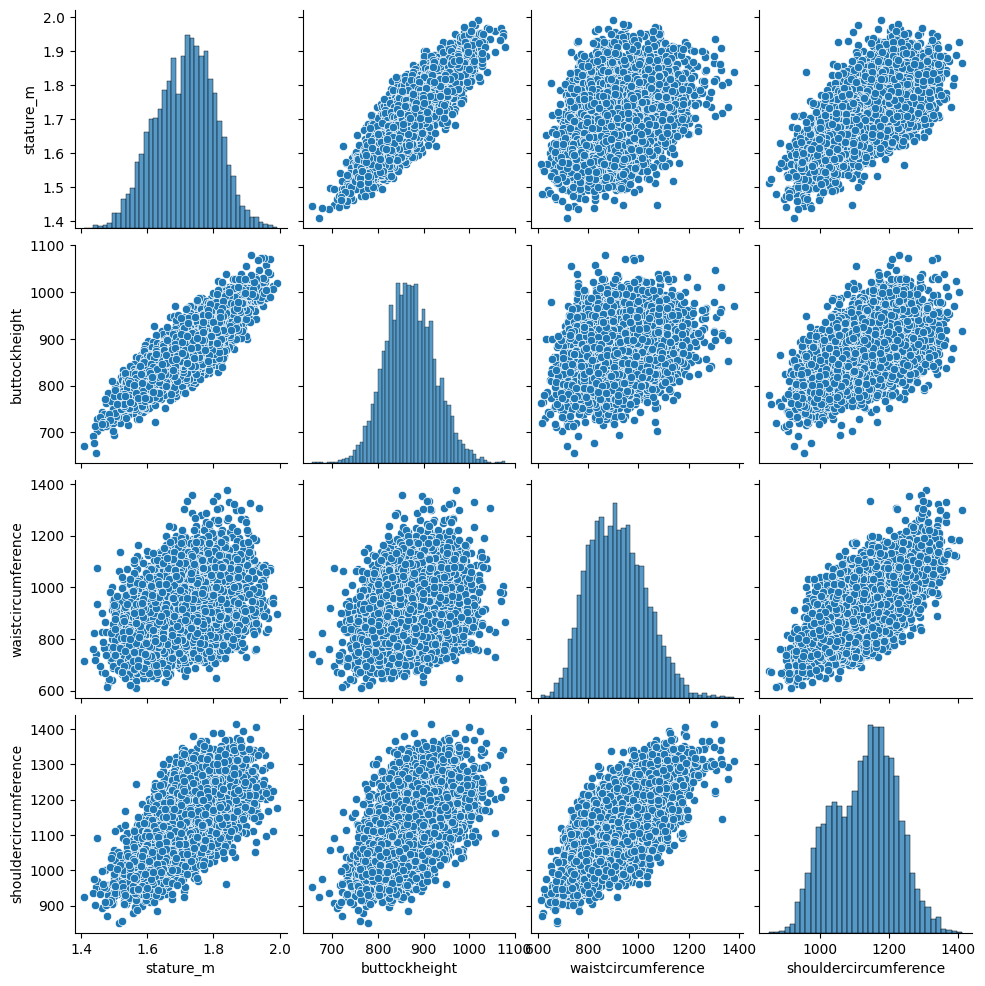

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

male_df = pd.read_csv('datasets/ANSUR_II_MALE.csv')
female_df = pd.read_csv('datasets/ANSUR_II_FEMALE.csv')

ansur_df = pd.concat([male_df, female_df])  

ansur_df = ansur_df[['stature_m', 'buttockheight','waistcircumference', 'shouldercircumference']]

# Create a pairplot to inspect ansur_df
sns.pairplot(ansur_df)

plt.show()

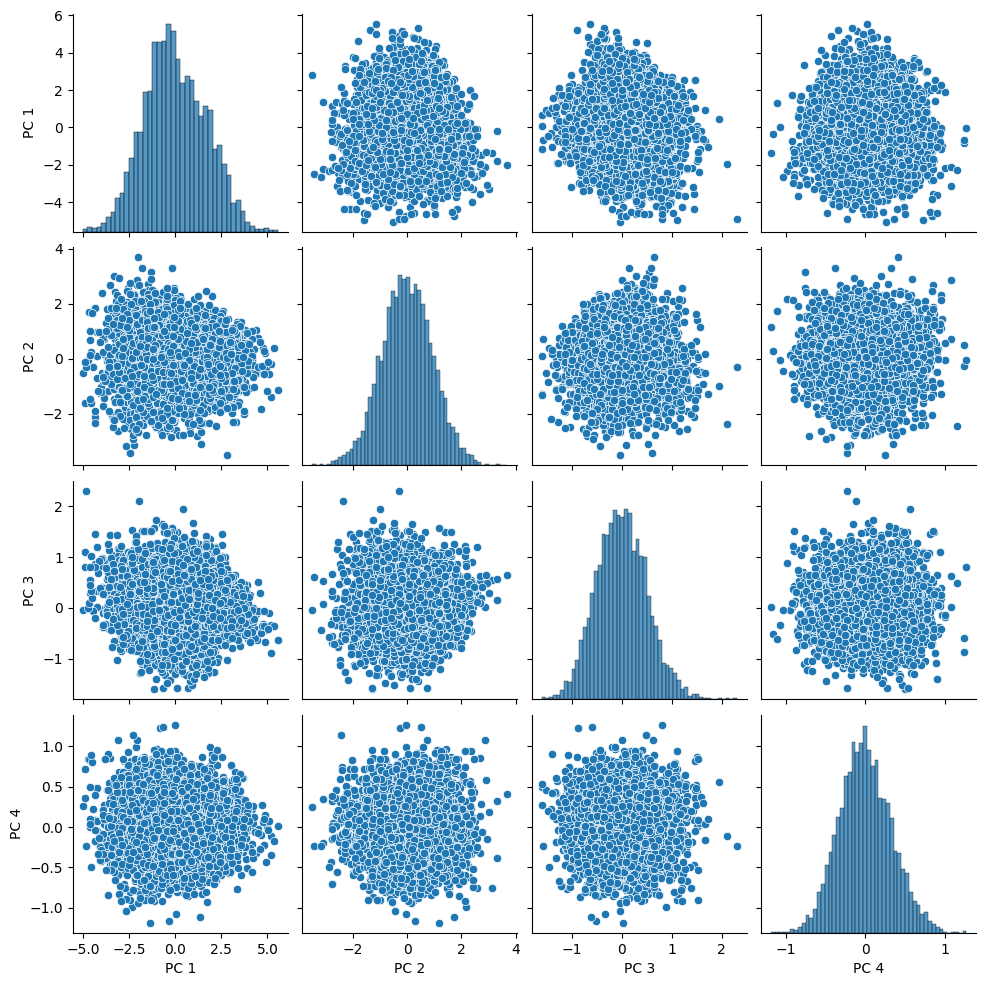

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create the scaler
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

# Create a pairplot of the principal component DataFrame
sns.pairplot(pc_df)
plt.show()

In contrast to the input features, none of the principal components are correlated to one another.

In [8]:
# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)

# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

[0.68770408 0.22168558 0.06350922 0.02710112]
[0.68770408 0.90938967 0.97289888 1.        ]


### Fitting PCA in a Pipeline

In [12]:
import pandas as pd
from sklearn.pipeline import Pipeline

poke_df = pd.read_csv('datasets/pokemon.csv')

poke_df = poke_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=2))])

# Fit it to the dataset and extract the component vectors
pipe.fit(poke_df)
vectors = pipe['reducer'].components_.round(2)

# Print feature effects
print('PC 1 effects = ' + str(dict(zip(poke_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(poke_df.columns, vectors[1]))))


PC 1 effects = {'HP': 0.39, 'Attack': 0.44, 'Defense': 0.36, 'Sp. Atk': 0.46, 'Sp. Def': 0.45, 'Speed': 0.34}
PC 2 effects = {'HP': 0.08, 'Attack': -0.01, 'Defense': 0.63, 'Sp. Atk': -0.31, 'Sp. Def': 0.24, 'Speed': -0.67}


All features have a similar posititve effect. PC1 can be read interpreted as a measure of overall quality.
Defense has a strong positive effect on the second PC and speed a strong negative effect. This component quantifies an agility versus armor protection trade-off.